In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# brief view of total train df
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


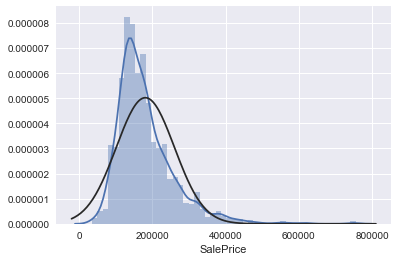

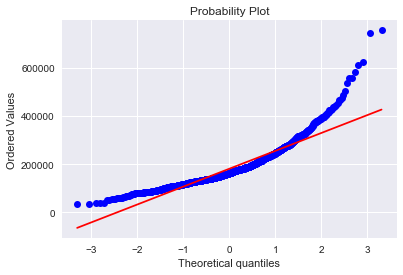

In [4]:
# target variable analysis
sns.distplot(df_train['SalePrice'], fit=norm)
plt.figure()
res = stats.probplot(df_train['SalePrice'],plot=plt)

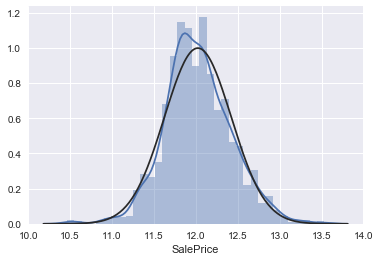

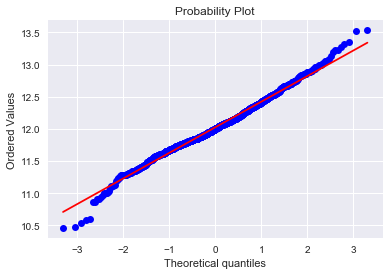

In [5]:
#log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'], fit=norm)
plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
# good

In [6]:
# deal with missing values
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],keys=['Total', 'Percent'], axis=1)
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [7]:
# drop all these unimportant variables and remove one line for electrical
df_train.drop(missing_data[missing_data['Total']>1].index, axis=1, inplace=True)
df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index, axis=0, inplace = True)

In [8]:
print('variable numbers after dropping missing data:', len(df_train.columns.tolist())-1)

variable numbers after dropping missing data: 62


In [9]:
# analysize variable types
cols = df_train.columns.tolist()
print('Total variable numebrs:',len(cols))
df_train.dtypes.unique()

Total variable numebrs: 63


array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [10]:
cat_count = 0
numeric_count = 0
for col in cols:
    if df_train[col].dtypes == 'object':
        uni_cat = len(df_train[col].unique())
        cat_count += 1
        print('Feature %s has %s unique values'%(col, uni_cat))
    else:
        numeric_count +=1
print('Categorical variable:', cat_count)
print('Numeric variable:', numeric_count)

Feature MSZoning has 5 unique values
Feature Street has 2 unique values
Feature LotShape has 4 unique values
Feature LandContour has 4 unique values
Feature Utilities has 2 unique values
Feature LotConfig has 5 unique values
Feature LandSlope has 3 unique values
Feature Neighborhood has 25 unique values
Feature Condition1 has 9 unique values
Feature Condition2 has 8 unique values
Feature BldgType has 5 unique values
Feature HouseStyle has 8 unique values
Feature RoofStyle has 6 unique values
Feature RoofMatl has 8 unique values
Feature Exterior1st has 15 unique values
Feature Exterior2nd has 16 unique values
Feature ExterQual has 4 unique values
Feature ExterCond has 5 unique values
Feature Foundation has 6 unique values
Feature Heating has 6 unique values
Feature HeatingQC has 5 unique values
Feature CentralAir has 2 unique values
Feature Electrical has 5 unique values
Feature KitchenQual has 4 unique values
Feature Functional has 7 unique values
Feature PavedDrive has 3 unique values

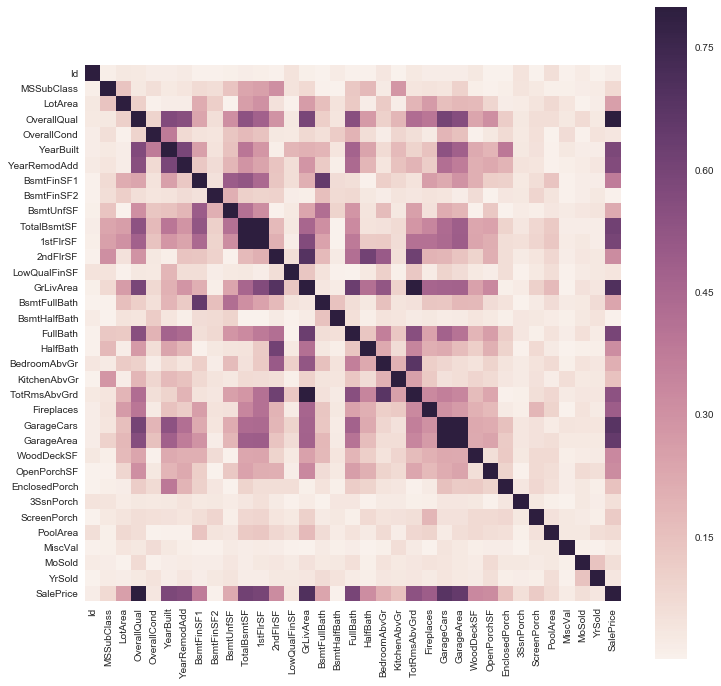

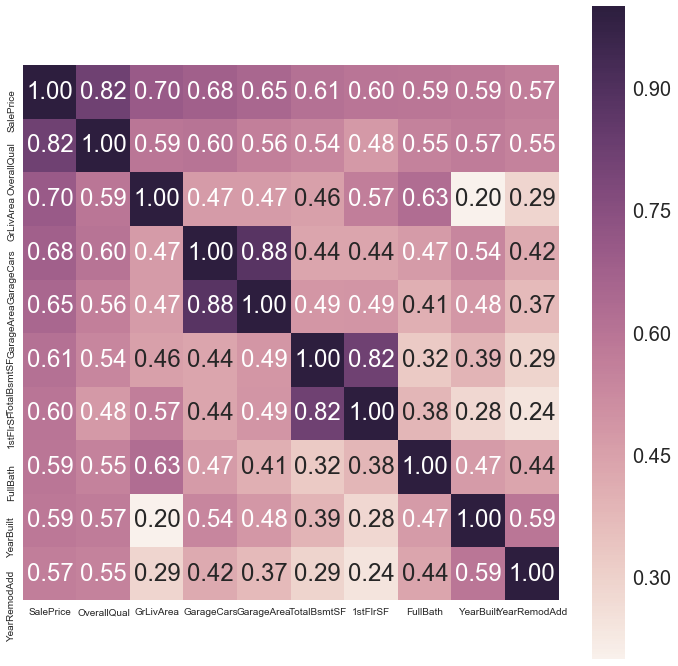

In [11]:
# absolute correlation heatmap
corrmat = df_train.corr().abs()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, vmax=.8, square=True)
# k largest correlations
k= 10
klargest_cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
# detailed correlation analysis
plt.subplots(figsize=(12,12))
cm = np.corrcoef(df_train[klargest_cols].values.T)
sns.set(font_scale=2)
sns.heatmap(cm, annot=True,square=True,fmt='.2f',yticklabels=klargest_cols.values, xticklabels=klargest_cols.values)
plt.show()
# This helps us get some most important features

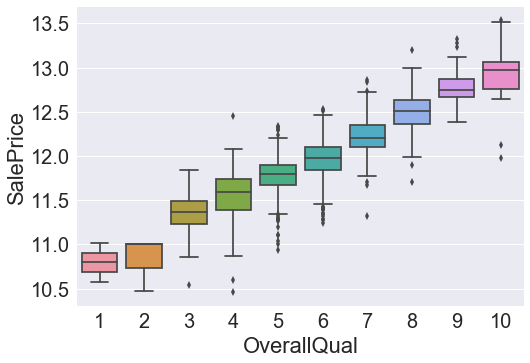

In [12]:
# outlier observations
# bivariate analysis
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
#data.plot.scatter(x=var, y='SalePrice');
sns.boxplot(x=var, y='SalePrice', data=data)
plt.show()

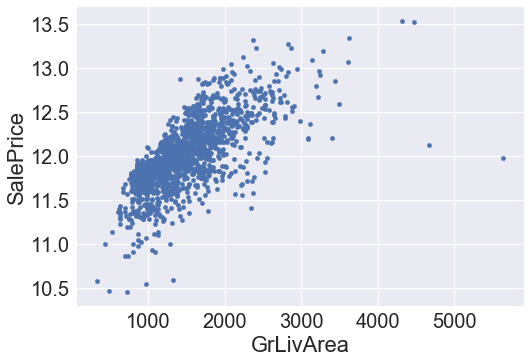

In [13]:
var = 'GrLivArea'
data = pd.concat([data['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice')

In [14]:
# remove 2 outliers
df_train['GrLivArea'].sort_values(ascending=False)
df_train.drop(df_train[df_train['Id'] == 1299].index, inplace=True)
df_train.drop(df_train[df_train['Id'] == 524].index, inplace=True)

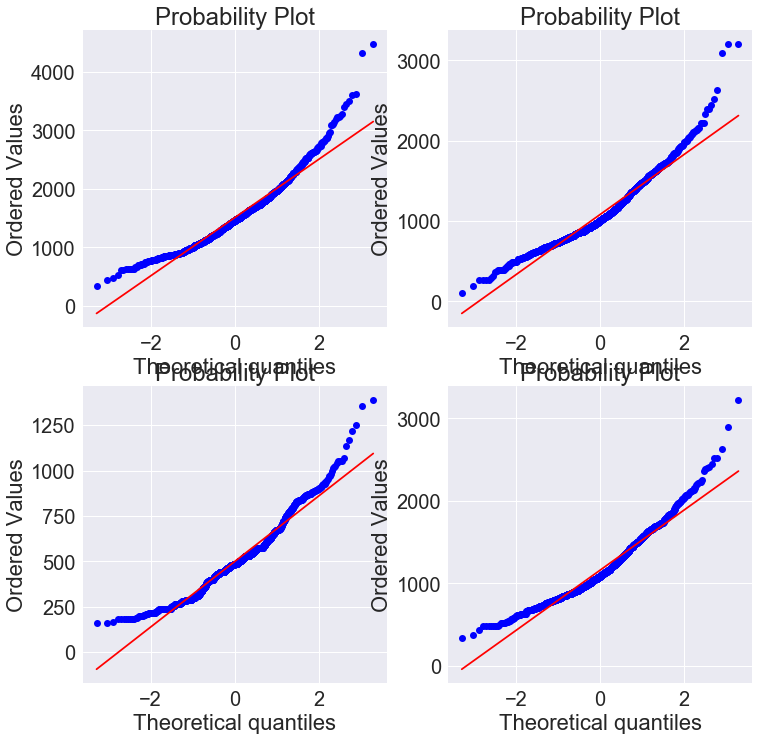

In [15]:
# feature engineering
# check normality of numeric variables
fig, ax = plt.subplots(2,2,figsize=(12,12))
stats.probplot(x=df_train['GrLivArea'],plot=ax[0][0])
stats.probplot(x=df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],plot=ax[0][1])
stats.probplot(x=df_train[df_train['GarageArea']>0]['GarageArea'],plot=ax[1][0])
stats.probplot(x=df_train['1stFlrSF'],plot=ax[1][1])
plt.show()

In [16]:
# log transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
df_train['1stFlrSF'] = np.log(df_train['1stFlrSF'])
df_train.loc[df_train['GarageArea']>0,'GarageArea'] = np.log(df_train['GarageArea'])
df_train.loc[df_train['TotalBsmtSF']>0, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

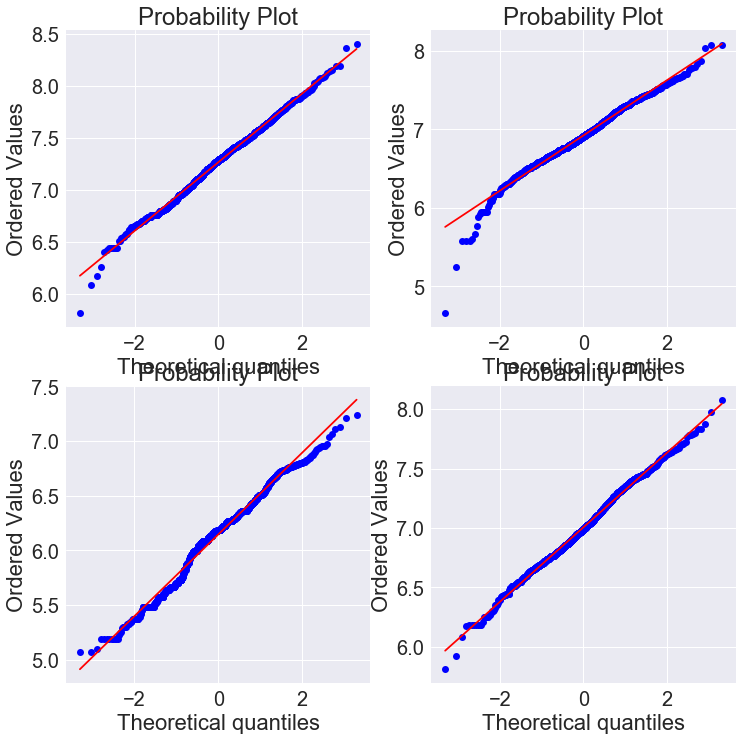

In [17]:
# check again
fig, ax = plt.subplots(2,2,figsize=(12,12))
stats.probplot(x=df_train['GrLivArea'],plot=ax[0][0])
stats.probplot(x=df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],plot=ax[0][1])
stats.probplot(x=df_train[df_train['GarageArea']>0]['GarageArea'],plot=ax[1][0])
stats.probplot(x=df_train['1stFlrSF'],plot=ax[1][1])
plt.show()

In [18]:
# get dummies for other categorical variables
df_train = pd.get_dummies(df_train)
# split x, y
X = df_train.drop('SalePrice', axis=1)
Y = df_train['SalePrice']
print('total variables:', len(X.columns.tolist()))

total variables: 220


## Modeling Part

In [19]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [20]:
# feture selection(do or not)
import sklearn.feature_selection

select = sklearn.feature_selection. SelectKBest(k=158)
selected_features = select.fit(x_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

x_train_selected = x_train[colnames_selected]
x_test_selected = x_test[colnames_selected]

In [21]:
colnames_selected[:20]

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr']

In [22]:
# scale the data
stdScaler = StandardScaler()
stdScaler.fit(x_train_selected)
x_train_scaled = stdScaler.transform(x_train_selected)
x_test_scaled = stdScaler.transform(x_test_selected)

In [23]:
# 1. linear regression model
from sklearn import linear_model
reg = linear_model.LinearRegression()
model = reg.fit(x_train_scaled, y_train)

In [24]:
# result analysis
from sklearn.metrics import r2_score
# R2 of train
yhat = model.predict(x_train_scaled)
r2_train = r2_score(yhat, y_train)
print('training r2:', r2_train)
# R2 of test
pred = model.predict(x_test_scaled)
r2_test = r2_score(pred, y_test)
print('testing r2:', r2_test)
# seems very good and no overfitting

training r2: 0.9378414307361592
testing r2: 0.9176297516043779


In [25]:
# perform the same data manipulation method on test dateset
df_test = pd.read_csv('test.csv')
Id_srs = df_test['Id']
df_test.drop(missing_data[missing_data['Total']>1].index, axis=1, inplace=True)
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])
df_test['1stFlrSF'] = np.log(df_test['1stFlrSF'])
df_test.loc[df_test['GarageArea']>0,'GarageArea'] = np.log(df_test['GarageArea'])
df_test.loc[df_test['TotalBsmtSF']>0, 'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])
                                                              
null_srs = df_test.isnull().sum().sort_values(ascending=False)
test_null_list = null_srs[null_srs>0].index.tolist()
common_list = [i for i in test_null_list if i in colnames_selected]
print('variables in testdf with null values needed to be replaced with values:', common_list)
                                                              
# filling na
# filling GarageCars and BsmtFullBath with mode
df_test['GarageCars'].value_counts()
df_test.loc[df_test['GarageCars'].isnull(),'GarageCars']= 2
df_test.loc[df_test['BsmtFullBath'].isnull(),'BsmtFullBath'] = 0
df_test.loc[df_test['BsmtHalfBath'].isnull(),'BsmtHalfBath'] = 0
# filling GarageArea, BsmtFinSF1, TotalBsmtSF, BsmtUnfSF with mean 
df_test.loc[df_test['TotalBsmtSF'].isnull(),'TotalBsmtSF']= np.mean(df_test['TotalBsmtSF'])
df_test.loc[df_test['BsmtFinSF1'].isnull(),'BsmtFinSF1']= np.mean(df_test['BsmtFinSF1'])
df_test.loc[df_test['GarageArea'].isnull(),'GarageArea']= np.mean(df_test['GarageArea'])
df_test.loc[df_test['BsmtUnfSF'].isnull(),'BsmtUnfSF']= np.mean(df_test['BsmtUnfSF'])
df_test.loc[df_test['BsmtFinSF2'].isnull(),'BsmtFinSF2'] = np.mean(df_test['BsmtFinSF2'])


                                                              
# get dummies
df_test = pd.get_dummies(df_test)
print('test dataset variables:', len(df_test.columns.tolist()))

# lacked variables checked
lacked_vars = [x for x in colnames_selected if x not in df_test.columns.tolist()]
print('test dataset lacked variables needed:', lacked_vars)
print('lacked numbers:', len(lacked_vars))

variables in testdf with null values needed to be replaced with values: ['BsmtHalfBath', 'BsmtFullBath', 'GarageCars', 'GarageArea', 'BsmtFinSF1', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2']
test dataset variables: 206
test dataset lacked variables needed: ['Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_Membran', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Electrical_Mix']
lacked numbers: 9


In [26]:
#df_test['BsmtHalfBath'].value_counts()

In [27]:
# remove these lacked variables and refit the model
x_train_selected.drop(lacked_vars,axis=1,inplace=True)
x_test_selected.drop(lacked_vars,axis=1,inplace=True)
stdScaler.fit(x_train_selected)
x_train_scaled = stdScaler.transform(x_train_selected)
x_test_scaled = stdScaler.transform(x_test_selected)
reg2 = linear_model.LinearRegression()
model2 = reg2.fit(x_train_scaled, y_train)

In [28]:
# model analysis again
# R2 of train
yhat = model2.predict(x_train_scaled)
r2_train = r2_score(yhat, y_train)
print('training r2:', r2_train)
# R2 of test
pred = model2.predict(x_test_scaled)
r2_test = r2_score(pred, y_test)
print('testing r2:', r2_test)
# still good
# print('variable numbers:', len(x_train_selected.columns.tolist()))

training r2: 0.9373294892646779
testing r2: 0.9179129240887307


In [29]:
# check if their cols are the same
cols = [x for x in df_test.columns.tolist() if x in x_train_selected.columns.tolist()]
df_test = df_test[cols]
stdScaler2 = StandardScaler()
stdScaler2.fit(x_train_selected)
df_test_scaled = stdScaler2.transform(df_test)
print(df_test.columns.tolist()==x_train_selected.columns.tolist())

True


In [30]:
# try predicting
final_output_srs = pd.Series(np.exp(model2.predict(df_test_scaled)))

In [31]:
print(len(final_output_srs)==len(Id_srs))

True


In [32]:
submission_df = pd.concat([Id_srs, final_output_srs], axis=1)
submission_df.columns=['Id', 'SalePrice']
submission_df.loc[submission_df['SalePrice']==np.inf, 'SalePrice']=np.mean(submission_df[submission_df['SalePrice']<np.inf]['SalePrice'])

In [33]:
# write file to excel
submission_df.to_csv('final_submission.csv',index=False, encoding='utf-8')

In [34]:
# 2 ridge regression
# perform the same data manipulation method on test dateset
df_test_origin = pd.read_csv('test.csv')
Id_srs = df_test_origin['Id']
df_test_origin.drop(missing_data[missing_data['Total']>1].index, axis=1, inplace=True)
df_test_origin['GrLivArea'] = np.log(df_test_origin['GrLivArea'])
df_test_origin['1stFlrSF'] = np.log(df_test_origin['1stFlrSF'])
df_test_origin.loc[df_test['GarageArea']>0,'GarageArea'] = np.log(df_test_origin['GarageArea'])
df_test_origin.loc[df_test['TotalBsmtSF']>0, 'TotalBsmtSF'] = np.log(df_test_origin['TotalBsmtSF'])
                                                              
null_srs = df_test_origin.isnull().sum().sort_values(ascending=False)
test_null_list = null_srs[null_srs>0].index.tolist()
# common_list = [i for i in test_null_list if i in colnames_selected]
print('variables in testdf with null values needed to be replaced with values:', test_null_list)
                                                              
# filling na
# filling GarageCars, BsmtFullBath.. with mode
from statistics import mode
df_test_origin['GarageCars'].value_counts()
df_test_origin.loc[df_test_origin['GarageCars'].isnull(),'GarageCars']= mode(df_test_origin['GarageCars'])
df_test_origin.loc[df_test_origin['BsmtFullBath'].isnull(),'BsmtFullBath'] = mode(df_test_origin['BsmtFullBath'])
df_test_origin.loc[df_test_origin['BsmtHalfBath'].isnull(),'BsmtHalfBath'] = mode(df_test_origin['BsmtHalfBath'])
df_test_origin.loc[df_test_origin['MSZoning'].isnull(),'MSZoning'] = mode(df_test_origin['MSZoning'])
df_test_origin.loc[df_test_origin['Functional'].isnull(),'Functional'] = mode(df_test_origin['Functional'])
df_test_origin.loc[df_test_origin['Utilities'].isnull(),'Utilities'] = mode(df_test_origin['Utilities'])
df_test_origin.loc[df_test_origin['Exterior2nd'].isnull(),'Exterior2nd'] = mode(df_test_origin['Exterior2nd'])
df_test_origin.loc[df_test_origin['Exterior1st'].isnull(),'Exterior1st'] = mode(df_test_origin['Exterior1st'])
df_test_origin.loc[df_test_origin['KitchenQual'].isnull(),'KitchenQual'] = mode(df_test_origin['KitchenQual'])
df_test_origin.loc[df_test_origin['SaleType'].isnull(),'SaleType'] = mode(df_test_origin['SaleType'])




# filling GarageArea, BsmtFinSF1, TotalBsmtSF, BsmtUnfSF.. with mean 
df_test_origin.loc[df_test_origin['TotalBsmtSF'].isnull(),'TotalBsmtSF']= np.mean(df_test_origin['TotalBsmtSF'])
df_test_origin.loc[df_test_origin['BsmtFinSF1'].isnull(),'BsmtFinSF1']= np.mean(df_test_origin['BsmtFinSF1'])
df_test_origin.loc[df_test_origin['GarageArea'].isnull(),'GarageArea']= np.mean(df_test_origin['GarageArea'])
df_test_origin.loc[df_test_origin['BsmtUnfSF'].isnull(),'BsmtUnfSF']= np.mean(df_test_origin['BsmtUnfSF'])
df_test_origin.loc[df_test_origin['BsmtFinSF2'].isnull(),'BsmtFinSF2'] = np.mean(df_test_origin['BsmtFinSF2'])


                                                              
# # get dummies
df_test_origin = pd.get_dummies(df_test_origin)
# print('test dataset variables:', len(df_test.columns.tolist()))

# lacked variables checked
lacked_vars = [x for x in X if x not in df_test_origin.columns.tolist()]
print('test dataset lacked variables needed:', lacked_vars)
print('lacked numbers:', len(lacked_vars))

variables in testdf with null values needed to be replaced with values: ['MSZoning', 'BsmtHalfBath', 'BsmtFullBath', 'Functional', 'Utilities', 'Exterior2nd', 'KitchenQual', 'GarageCars', 'GarageArea', 'BsmtFinSF1', 'SaleType', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'Exterior1st']
test dataset lacked variables needed: ['Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix']
lacked numbers: 14


In [35]:
# from statistics import mode,median
# df_test_origin['SaleType'].value_counts()

In [36]:
from sklearn.cross_validation import train_test_split
X.drop(lacked_vars, axis=1, inplace=True)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

# scale the data
stdScaler = StandardScaler()
stdScaler.fit(x_train)
x_train_scaled = stdScaler.transform(x_train)
x_test_scaled = stdScaler.transform(x_test)

print(df_test_origin.columns.tolist()==x_train.columns.tolist())

True


In [37]:
# scale test dataset
df_test_scaled = stdScaler.transform(df_test_origin)

In [38]:
# grid search cross validation method
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
params = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]}
ridge = GridSearchCV(Ridge(), params, cv=5)
ridge.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [39]:
print('ridge best parameters: %s'%(ridge.best_params_))
print('ridge best score:%s'%(ridge.best_score_))

ridge best parameters: {'alpha': 100}
ridge best score:0.9102891061060242


In [40]:
print('R2 on train dataset:%s'%(ridge.score(x_train_scaled,y_train)))
print('R2 on test dataset:%s'%(ridge.score(x_test_scaled,y_test)))
# looks also good

R2 on train dataset:0.9440993389066972
R2 on test dataset:0.9201240089040791


In [41]:
# ridge predict
ridge_saleprice_srs = pd.Series(np.exp(ridge.predict(df_test_scaled)))
output_df = pd.concat([Id_srs,ridge_saleprice_srs],axis=1)
output_df.columns=['Id', 'SalePrice']
output_df.to_csv('final_submission.csv',index=False, encoding='utf-8')

In [42]:
# 3 lasso regression
# the same as ridge
from sklearn.linear_model import Lasso
params = {'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]}
lasso = GridSearchCV(Lasso(), params, cv=5)
lasso.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [43]:
print('lasso best parameters: %s'%(lasso.best_params_))
print('lasso best score:%s'%(lasso.best_score_))

lasso best parameters: {'alpha': 0.001}
lasso best score:0.9119962899225025


In [44]:
print('R2 on train dataset:%s'%(lasso.score(x_train_scaled,y_train)))
print('R2 on test dataset:%s'%(lasso.score(x_test_scaled,y_test)))
# looks also good

R2 on train dataset:0.9452135687993924
R2 on test dataset:0.9214919958746062


In [45]:
# lasso predict
lasso_saleprice_srs = pd.Series(np.exp(lasso.predict(df_test_scaled)))
output_df = pd.concat([Id_srs,lasso_saleprice_srs],axis=1)
output_df.columns=['Id', 'SalePrice']
output_df.to_csv('final_submission.csv',index=False, encoding='utf-8')

In [46]:
# 4 SVR
from sklearn.svm import SVR
import time
start = time.time()
params_svr = {'kernel': ['rbf','linear','poly','sigmoid'],
             'epsilon': [0.0001,0.001,0.01,0.1,1]}
svr = GridSearchCV(SVR(), params_svr, cv=5)
svr.fit(x_train_scaled, y_train)
print('svr training time %.2f minutes'%((time.time()-start)/60))

svr training time 5.58 minutes


In [47]:
print('svr best parameters: %s'%(svr.best_params_))
print('svr best score:%s'%(svr.best_score_))

svr best parameters: {'epsilon': 0.01, 'kernel': 'linear'}
svr best score:0.904642142323515


In [48]:
print('R2 on train dataset:%s'%(svr.score(x_train_scaled,y_train)))
print('R2 on test dataset:%s'%(svr.score(x_test_scaled,y_test)))
# looks also good

R2 on train dataset:0.9407789271257421
R2 on test dataset:0.9014552216307219


In [51]:
svr_saleprice_srs = pd.Series(np.exp(svr.predict(df_test_scaled)))
svr_output_df = pd.concat([Id_srs, svr_saleprice_srs], axis=1)
svr_output_df.columns = ['Id', 'SalePrice']
svr_output_df.loc[svr_output_df['SalePrice']==np.inf, 'SalePrice']=np.mean(svr_output_df[svr_output_df['SalePrice']<np.inf]['SalePrice'])
svr_output_df.to_csv('svr.csv', index=False, encoding='utf-8')

In [53]:
# 5 RF
from sklearn.ensemble import RandomForestRegressor
params_rf = {'n_estimators': [10,100,1000,10000],
             'max_features': ['auto','log2'],
             'max_depth': [None,2,5,10],
             'max_leaf_nodes': [None,2,5]
}
start = time.time()
rf = GridSearchCV(RandomForestRegressor(), params_rf, cv=5)
rf.fit(x_train_scaled, y_train)
print('training time:%s minutes'%((time.time()-start)/60))

training time:97.80180116891862 minutes


In [54]:
print('rf best parameters: %s'%(rf.best_params_))
print('rf best score:%s'%(rf.best_score_))

rf best parameters: {'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'n_estimators': 10000}
rf best score:0.8696467667605181


In [55]:
print('R2 on train dataset:%s'%(rf.score(x_train_scaled,y_train)))
print('R2 on test dataset:%s'%(rf.score(x_test_scaled,y_test)))
# looks also good

R2 on train dataset:0.9832486844411858
R2 on test dataset:0.9025183769657703


In [56]:
rf_saleprice_srs = pd.Series(np.exp(rf.predict(df_test_scaled)))
rf_output_df = pd.concat([Id_srs, rf_saleprice_srs], axis=1)
rf_output_df.columns = ['Id', 'SalePrice']
rf_output_df.loc[rf_output_df['SalePrice']==np.inf, 'SalePrice']=np.mean(rf_output_df[rf_output_df['SalePrice']<np.inf]['SalePrice'])
rf_output_df.to_csv('rf.csv', index=False, encoding='utf-8')

In [57]:
# 6 xgboost
import xgboost as xgb
# xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
#                            colsample_bytree=1, max_depth=7)
params_xgb = {'n_estimators': [10,100,100,1000,10000],
              'learning_rate': [0.02,0.08,0.2,0.5,1],
              'gamma': [0],
              'max_depth': [2,5,7,10,15]
}
start = time.time()
xgb_fit = GridSearchCV(xgb.XGBRegressor(), params_xgb, cv=5)
xgb_fit.fit(x_train_scaled, y_train)
end = time.time()
print('traing time:%s minutes'%((end-start)/60))

traing time:59.90290413697561 minutes


In [58]:
print('xgb best parameters: %s'%(xgb_fit.best_params_))
print('xgb best score:%s'%(xgb_fit.best_score_))

xgb best parameters: {'gamma': 0, 'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': 1000}
xgb best score:0.908663186420018


In [59]:
print('R2 on train dataset:%s'%(xgb_fit.score(x_train_scaled,y_train)))
print('R2 on test dataset:%s'%(xgb_fit.score(x_test_scaled,y_test)))
# looks also good

R2 on train dataset:0.9811091420935326
R2 on test dataset:0.9262648397325605


In [60]:
xgb_saleprice_srs = pd.Series(np.exp(xgb_fit.predict(df_test_scaled)))
xgb_output_df = pd.concat([Id_srs, xgb_saleprice_srs], axis=1)
xgb_output_df.columns = ['Id', 'SalePrice']
xgb_output_df.loc[xgb_output_df['SalePrice']==np.inf, 'SalePrice']=np.mean(xgb_output_df[xgb_output_df['SalePrice']<np.inf]['SalePrice'])
xgb_output_df.to_csv('xgb.csv', index=False, encoding='utf-8')

In [64]:
# xgb exploration
# xgb.plot_importance(xgb_fit)

In [65]:
# # create others for this
# other_list= ['BrkComm','Stone','AsphShn','ImStucc','CBlock']
# df_train['Exterior1st'] = ['Others' if x in other_list else x for x in df_train['Exterior1st']]

In [66]:
# df_train['Exterior1st'].value_counts()

In [67]:
# df_train['Exterior2nd'].value_counts()

In [68]:
# other_list2= ['Brk Cmn','Stone','AsphShn','ImStucc','CBlock','Other']
# df_train['Exterior2nd'] = ['Others' if x in other_list2 else x for x in df_train['Exterior2nd']]

In [69]:
# df_train['Exterior2nd'].value_counts()

In [70]:
# # missing data
# total = df_train.isnull().sum().sort_values(ascending=False)
# percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
# missing_data.head(20)

In [71]:
# first remove electrical 1 line
# df_train.drop(df_train['Electrical'].isnull().index,axis=0,inplace=True)